# Project 1

We will be analyzing the flight delays for Alaska and AM West airlines across five cities: Los Angeles, Phoenix, San Diego, San Francisco, and Seattle. The goal is to compare the performance of these airlines in terms of on-time arrivals and delays, and visualize the differences using tables, bar charts, and pie charts.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
import matplotlib

#Loading dataset
df = pd.read_csv("flights.csv")

#Preview
df.head()

,Airline,Status,City,Flights
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,ALASKA,on time,Phoenix,221
3,ALASKA,delayed,Phoenix,12
4,ALASKA,on time,San Diego,212


The dataset is imported from a CSV file. Previewing the data shows that it has loaded correctly and is ready for analysis.

Total Flights by Airline

In [122]:
total_flights = df.groupby("Airline")["Flights"].sum().reset_index()
total_flights

,Airline,Flights
0,ALASKA,3775
1,AM WEST,7225


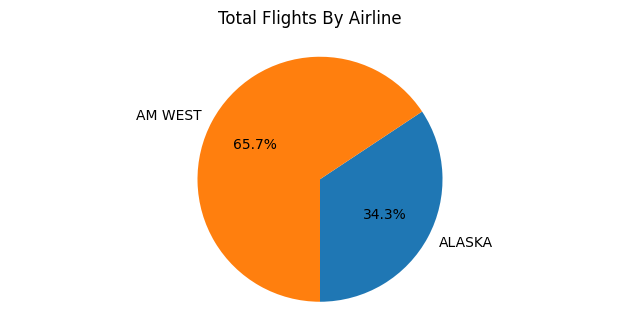

In [123]:
# Extract data for the pie chart
data = total_flights["Flights"].values
labels = total_flights["Airline"].values

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.pie(data,
       labels=labels,
       autopct='%1.1f%%',
       startangle=270)

# Keep pie chart as a circle
ax.axis('equal')

# Add title
fig.suptitle("Total Flights By Airline")
plt.show()

We first calculate the total number of flights per airline.
ALASKA operates 3,773 flights across the five cities.
AM West operates 6,755 flights, nearly twice as many as ALASKA.
The pie chart helps illustrate the difference in total operations between the two airlines.

Total Flights by Status of Each Airline

In [124]:
total = df.groupby(["Airline", "Status"])["Flights"].sum().reset_index()
total

,Airline,Status,Flights
0,ALASKA,delayed,501
1,ALASKA,on time,3274
2,AM WEST,delayed,787
3,AM WEST,on time,6438


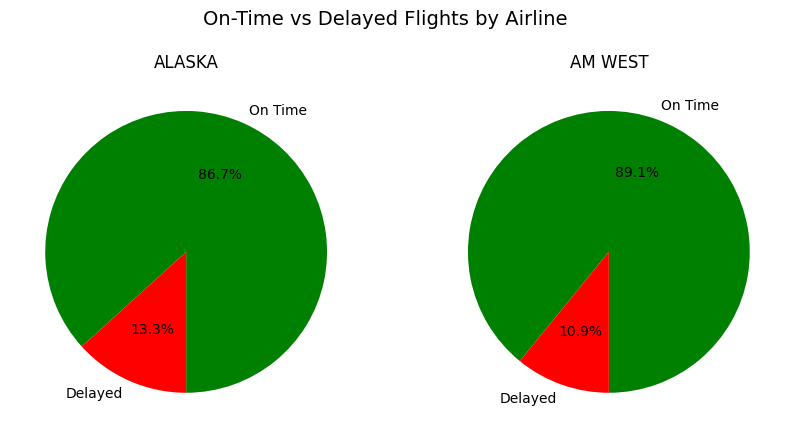

In [125]:
# Filter only delayed flights
AL_delay = df[(df["Airline"] == "ALASKA") & (df["Status"] == "delayed")]["Flights"].sum()
AM_delay = df[(df["Airline"] == "AM WEST") & (df["Status"] == "delayed")]["Flights"].sum()

#Filter only on time flights
AL_ot = df[(df["Airline"] == "ALASKA") & (df["Status"] == "on time")]["Flights"].sum()
AM_ot = df[(df["Airline"] == "AM WEST") & (df["Status"] == "on time")]["Flights"].sum()

# Data for pie charts
labels = ["On Time", "Delayed"]

# ALASKA values
alaska_values = [AL_ot, AL_delay]

# AM WEST values
amwest_values = [AM_ot, AM_delay]

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# ALASKA pie
axes[0].pie(alaska_values, labels=labels, autopct='%1.1f%%', startangle=270, colors=["green", "red"])
axes[0].set_title("ALASKA")

# AM WEST pie
axes[1].pie(amwest_values, labels=labels, autopct='%1.1f%%', startangle=270, colors=["green", "red"])
axes[1].set_title("AM WEST")

# Main title
fig.suptitle("On-Time vs Delayed Flights by Airline", fontsize=14)

plt.show()

Next, we separate flights into on-time and delayed categories for each airline.
AM West operates more flights overall, ALASKA has a slightly higher proportion of delays relative to its total flights.

Delay percentage by city for each airline

In [126]:
# Pivot for comparison
pivot = df.pivot_table(values="Flights", index=["Airline","City"], columns="Status", aggfunc="sum").reset_index()
pivot = pivot.fillna(0)

# Add delay rate column
pivot["Delay Rate (%)"] = (pivot["delayed"] / (pivot["on time"] + pivot["delayed"])) * 100
pivot

Status,Airline,City,delayed,on time,Delay Rate (%)
0,ALASKA,Los Angeles,62,497,11.091234
1,ALASKA,Phoenix,12,221,5.150215
2,ALASKA,San Diego,20,212,8.620690
3,ALASKA,San Francisco,102,503,16.859504
4,ALASKA,Seattle,305,1841,14.212488
5,AM WEST,Los Angeles,117,694,14.426634
6,AM WEST,Phoenix,415,4840,7.897241
7,AM WEST,San Diego,65,383,14.508929
8,AM WEST,San Francisco,129,320,28.730512
9,AM WEST,Seattle,61,201,23.282443


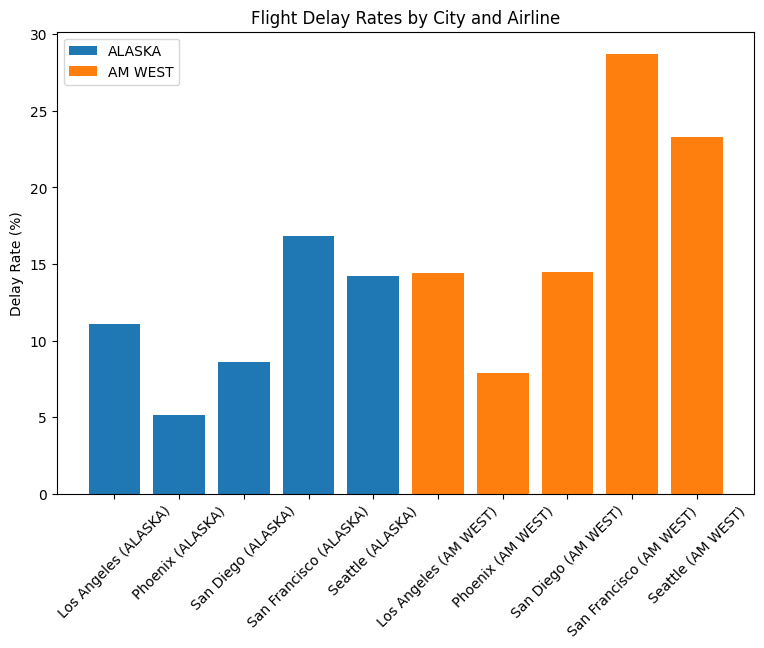

In [127]:
plt.figure(figsize=(9,6))
for airline in pivot["Airline"].unique():
    subset = pivot[pivot["Airline"] == airline]
    plt.bar(subset["City"] + " (" + airline + ")", subset["Delay Rate (%)"], label=airline)

plt.xticks(rotation=45)
plt.ylabel("Delay Rate (%)")
plt.title("Flight Delay Rates by City and Airline")
plt.legend()
plt.show()

From the city-level delay rate chart, we can see the following:
- San Francisco and Seattle have the highest rate of delays for both airlines.
- Phoenix shows very low delays for both airlines.

This highlights that city-level performance varies, and total flight counts alone do not fully capture whole story.

#Conclusion

Overall, AM West operates far more flights than ALASKA, but maintains a lower proportion of delays. ALASKA shows higher delay rates in some cities despite fewer flights. The visualizations help provide a clearer comparison of airline reliability.